<ipython-input-17-4091fb7f47f1>:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Ethnicity.csv')
<ipython-input-17-4091fb7f47f1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ethnicity_counts, x='Ethnicity', y='Count', palette='coolwarm')


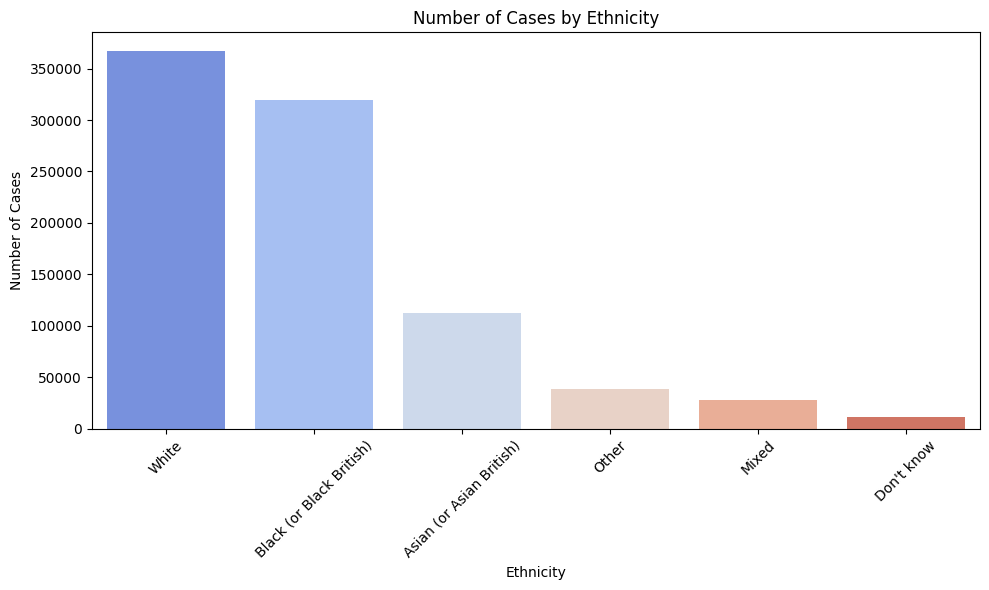

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Ethnicity.csv')
data['SubjectEthnicity'] = data['SubjectEthnicity'].replace('Chinese', 'Asian (or Asian British)')

ethnicity_counts = data['SubjectEthnicity'].value_counts().reset_index()
ethnicity_counts.columns = ['Ethnicity', 'Count']

# Sort the counts for consistent plotting order
ethnicity_counts = ethnicity_counts.sort_values(by='Count', ascending=False)

# Plot using seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=ethnicity_counts, x='Ethnicity', y='Count', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Number of Cases by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()




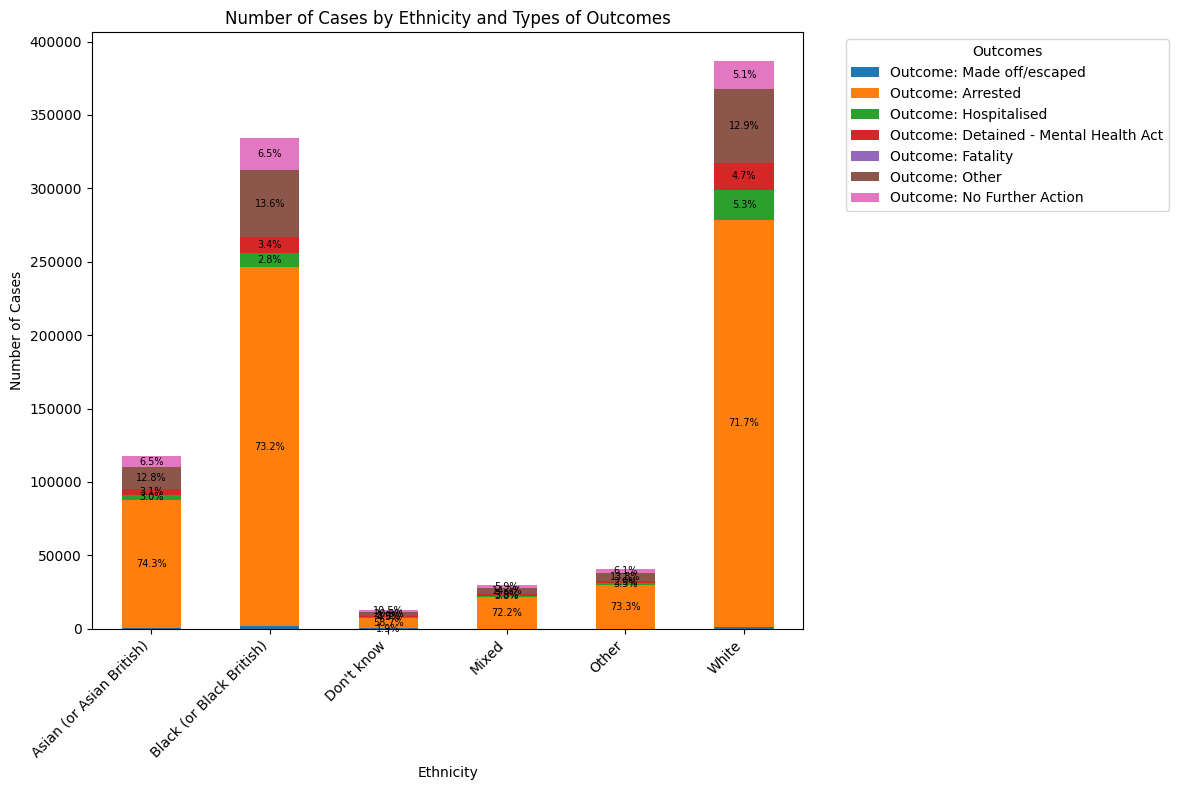

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert "Yes"/"No" to numeric values for summing
outcome_columns = data.columns[1:]  # Exclude the ethnicity column
data_numeric = data.copy()
data_numeric[outcome_columns] = (data[outcome_columns] == 'Yes').astype(int)

# Replace 'Chinese' with 'Asian (or Asian British)' for combination
data_numeric['SubjectEthnicity'] = data_numeric['SubjectEthnicity'].replace('Chinese', 'Asian (or Asian British)')

# Group the data by the updated ethnicity and sum the outcomes
grouped_data = data_numeric.groupby('SubjectEthnicity').sum()

# Calculate the total cases for each ethnicity
total_cases_by_ethnicity = grouped_data.sum(axis=1)

# Plotting the stacked bar chart with annotations
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Add annotations with percentage values
for i, ethnicity in enumerate(grouped_data.index):
    cumulative_height = 0
    for outcome, value in grouped_data.loc[ethnicity].items():
        # Calculate percentage and position
        percentage = value / total_cases_by_ethnicity[ethnicity] * 100
        y_position = cumulative_height + (value / 2)
        if percentage > 1:  # Only display if the segment is large enough to fit the text
            ax.text(i, y_position, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=7)
        cumulative_height += value

ax.set_xlabel('Ethnicity')
ax.set_ylabel('Number of Cases')
ax.set_title('Number of Cases by Ethnicity and Types of Outcomes')
ax.set_xticklabels(grouped_data.index, rotation=45, ha='right')  # Adjust alignment
plt.legend(title='Outcomes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()



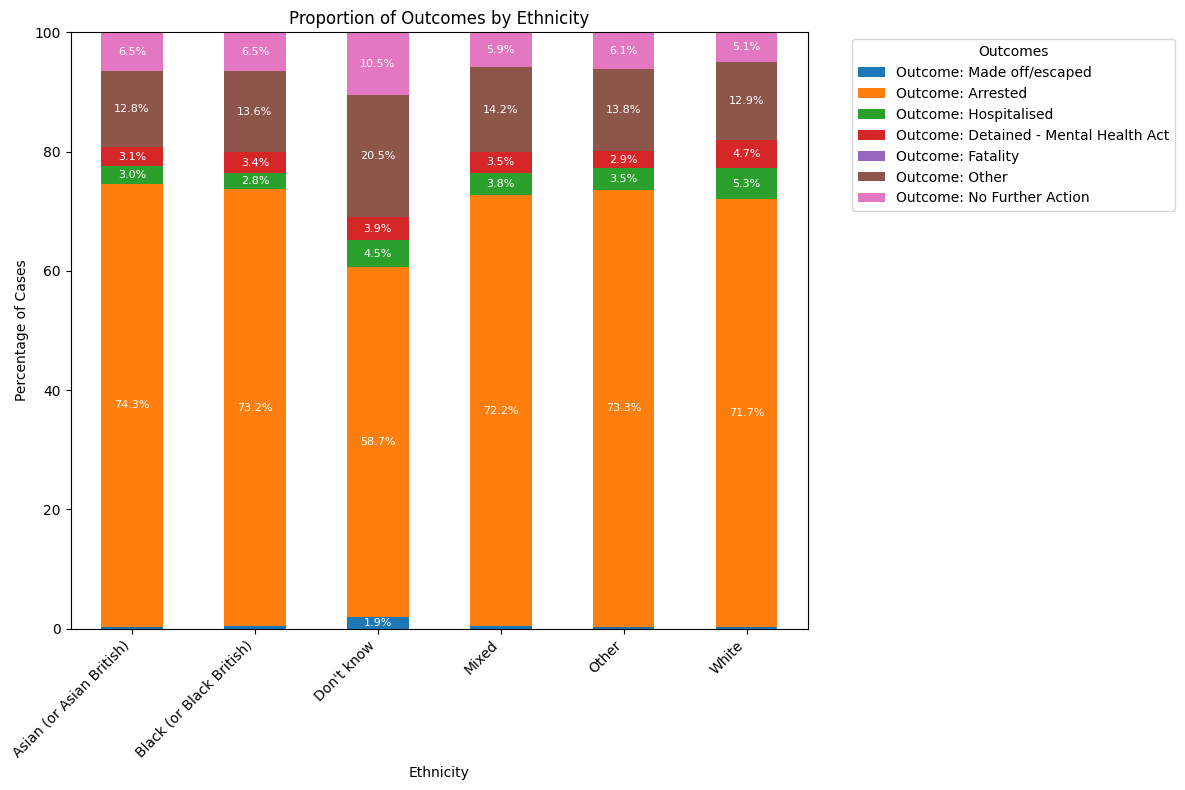

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert "Yes"/"No" to numeric values for summing
outcome_columns = data.columns[1:]  # Exclude the ethnicity column
data_numeric = data.copy()
data_numeric[outcome_columns] = (data[outcome_columns] == 'Yes').astype(int)

# Replace 'Chinese' with 'Asian (or Asian British)' for combination
data_numeric['SubjectEthnicity'] = data_numeric['SubjectEthnicity'].replace('Chinese', 'Asian (or Asian British)')

# Group the data by the updated ethnicity and sum the outcomes
grouped_data = data_numeric.groupby('SubjectEthnicity').sum()

# Calculate the total cases for each ethnicity
total_cases_by_ethnicity = grouped_data.sum(axis=1)

# Calculate the ratio of each outcome for each ethnicity
ratio_of_outcomes = grouped_data.div(total_cases_by_ethnicity, axis=0) * 100

# Plotting the stacked bar chart with annotations
fig, ax = plt.subplots(figsize=(12, 8))
ratio_of_outcomes.plot(kind='bar', stacked=True, ax=ax)

# Add annotations with percentage values
for i, ethnicity in enumerate(ratio_of_outcomes.index):
    cumulative_height = 0
    for outcome, value in ratio_of_outcomes.loc[ethnicity].items():
        # Calculate position for percentage text
        y_position = cumulative_height + (value / 2)
        if value > 1:  # Only display if the segment is large enough to fit the text
            ax.text(i, y_position, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=8)
        cumulative_height += value

ax.set_xlabel('Ethnicity')
ax.set_ylabel('Percentage of Cases')
ax.set_title('Proportion of Outcomes by Ethnicity')
ax.set_xticklabels(ratio_of_outcomes.index, rotation=45, ha='right')  # Adjust alignment
ax.set_ylim(0, 100)  # Set y-axis from 0 to 100%
plt.legend(title='Outcomes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()
